## **Atoki Bolutife Stage B Graded Quiz**
## **Hamoye ID: 146eb340cb01f000**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


To check number of missing data

In [4]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

Converting FullDate into datetime format

In [5]:
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


Setting Index as FullDate

In [6]:
df.set_index('FullDate', inplace = True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


Using Daily Sampling rate i.e Downsampling from hourly to daily 

In [7]:
df_daily = df.resample('D').sum()
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


Plotting Data ElecPrice (y) against FullDate (dt)

Text(0.5, 1.0, 'Plotting Data ElecPrice (y) against FullDate (dt)')

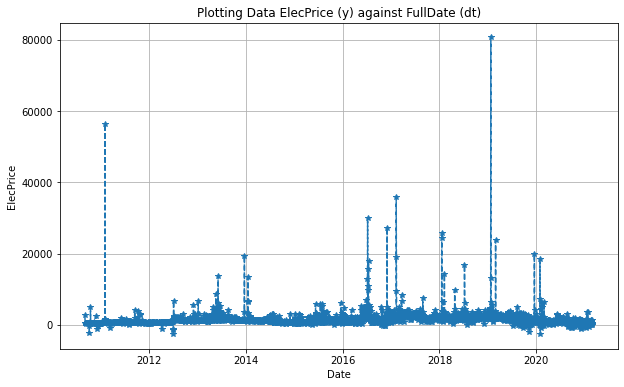

In [8]:
plt.figure(figsize = (10, 6))
plt.plot(df_daily.index, df_daily.ElecPrice, '--', marker = '*')
plt.grid()
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('Plotting Data ElecPrice (y) against FullDate (dt)')

#### EDA for Time Series

Graphing dataset to show observed, residual, seasonality and trend

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


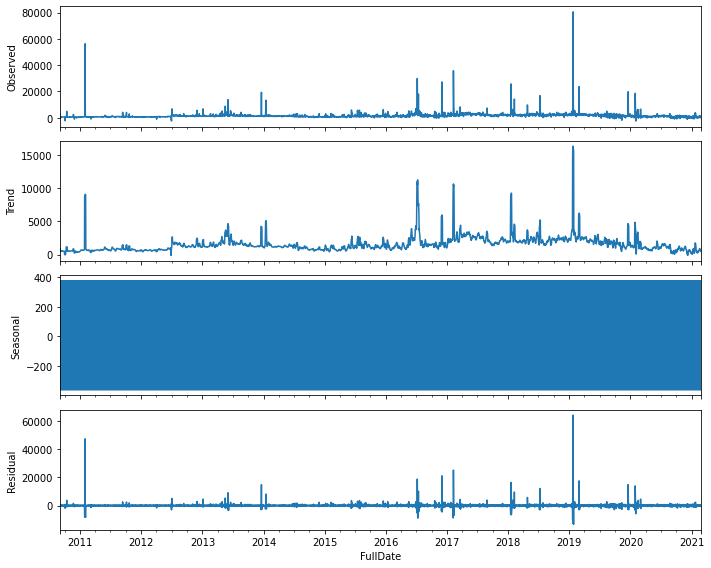

In [9]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
decompose_series = sm.tsa.seasonal_decompose(df_daily['ElecPrice'], model = 'additive')
decompose_series.plot()
plt.show()

Performing Augumented Dickey-Fuller (ADF) test to confirm Time series is Non-Stationary

In [10]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic = {result[0]}')
print(f'p-value of SysLoad to 6dp = {round(result[1], 6)}')
print('critical values are: ')
for f, v in result[4].items():
    print(f'{f} : {v}')

ADF Statistic = -2.90276669716518
p-value of SysLoad to 6dp = 0.045027
critical values are: 
1% : -3.4320693157877544
5% : -2.8622996992165364
10% : -2.5671743978048323


In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic = {result[0]}')
print(f'p-value of Gas Price to 6dp = {round(result[1], 6)}')
print('critical values are: ')
for f, v in result[4].items():
    print(f'{f} : {v}')

ADF Statistic = -2.90276669716518
p-value of Gas Price to 6dp = 0.045027
critical values are: 
1% : -3.4320693157877544
5% : -2.8622996992165364
10% : -2.5671743978048323


In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_daily['ElecPrice'])
print(f'ADF Statistic = {result[0]}')
print(f'p-value = {round(result[1], 6)}')
print(f'Number of lags used = {result[2]}')
print(f'Number of Observations = {result[3]}')
print('critical values are: ')
for f, v in result[4].items():
    print(f'{f} : {v}')

ADF Statistic = -8.269053866873803
p-value = 0.0
Number of lags used = 20
Number of Observations = 3813
critical values are: 
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


Since p-value (0.00) < 0.05 and ADF Statistic is lesser than 5% critical value, then the series is indeed <strong>Stationary</strong>.

#### Assigning ds and y values

First, make a copy of df_daily and reset index

In [13]:
df_daily_copy = df_daily.copy().reset_index()
df_daily_copy.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


Selecting columns FullDate and ElecPrice and renaming to ds and y respectively

In [14]:
df_daily_copy = df_daily_copy[['FullDate', 'ElecPrice']].rename(columns = {'FullDate' : 'ds', 'ElecPrice' : 'y'})
df_daily_copy.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


##### Splitting dataset into train & test set, such that train = first 2757 days and test = datasetlength - 2757 

In [15]:
x_train, x_test = df_daily_copy[:2757], df_daily_copy[2757:]
x_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [16]:
y_train, y_test = df_daily_copy.y[:2757], df_daily_copy.y[2757:]
y_train.head()

0    2751.700
1     570.810
2     504.975
3     502.275
4     500.555
Name: y, dtype: float64

In [17]:
y_test.head()

2757    1833.00
2758    1730.49
2759    2260.55
2760    2138.76
2761    1721.70
Name: y, dtype: float64

#### **To train model using Facebook Prophet**

Import Facebook Prophet

In [18]:
from fbprophet import Prophet

Training model

In [19]:
model = Prophet()
model.fit(x_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predicting for length of test set

In [20]:
future = model.make_future_dataframe(len(x_test), freq = 'D')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,851.777631,-1336.482662,3449.910280,851.777631,851.777631,144.250503,144.250503,144.250503,159.308129,159.308129,159.308129,-15.057627,-15.057627,-15.057627,0.0,0.0,0.0,996.028134
1,2010-09-02,851.727173,-1275.853646,3460.089662,851.727173,851.727173,224.453910,224.453910,224.453910,257.036327,257.036327,257.036327,-32.582418,-32.582418,-32.582418,0.0,0.0,0.0,1076.181083
2,2010-09-03,851.676716,-1507.336292,3346.491433,851.676716,851.676716,-0.584510,-0.584510,-0.584510,50.257478,50.257478,50.257478,-50.841988,-50.841988,-50.841988,0.0,0.0,0.0,851.092206
3,2010-09-04,851.626258,-1819.263776,2970.251513,851.626258,851.626258,-340.872526,-340.872526,-340.872526,-271.372061,-271.372061,-271.372061,-69.500465,-69.500465,-69.500465,0.0,0.0,0.0,510.753732
4,2010-09-05,851.575800,-2030.126900,2758.909338,851.575800,851.575800,-430.884955,-430.884955,-430.884955,-342.634443,-342.634443,-342.634443,-88.250512,-88.250512,-88.250512,0.0,0.0,0.0,420.690845


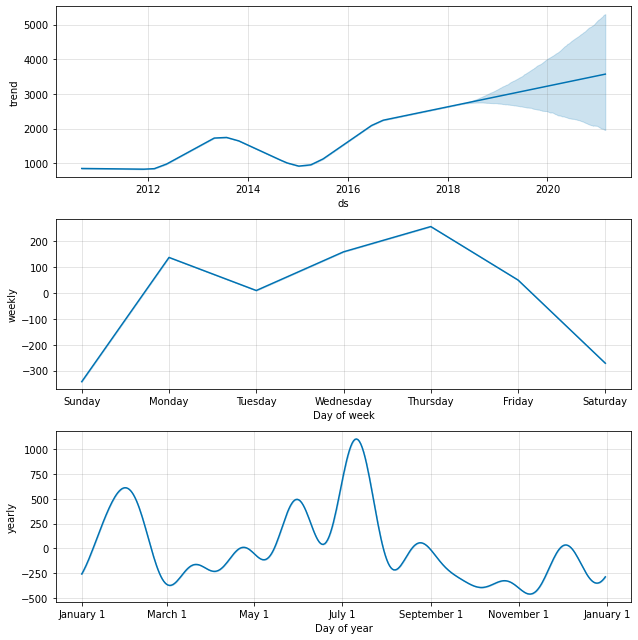

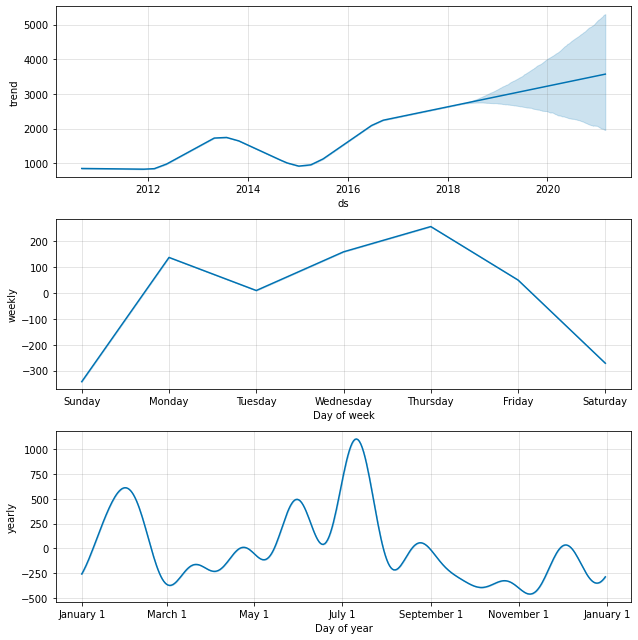

In [21]:
model.plot_components(forecast)

#### **Training model with regressors SysLoad, Tmax and GasPrice as add1, add2, add3**

Getting variable 'data'

In [22]:
data = df_daily.copy().reset_index()
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [23]:
data = data.rename(columns = {'FullDate' : 'ds', 'ElecPrice' : 'y', 'SysLoad' : 'add1', 'Tmax' : 'add2', 'GasPrice' : 'add3'})
data.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


##### Splitting dataset into train & test set, such that train = first 2757 days and test = datasetlength - 2757 

In [24]:
data_train, data_test = data[:2757], data[2757:]
data_train.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [25]:
data_y_train, data_y_test = data.y[:2757], data.y[2757:]
data_y_train.head()

0    2751.700
1     570.810
2     504.975
3     502.275
4     500.555
Name: y, dtype: float64

In [26]:
data_train.isnull().sum()

ds      0
add2    0
add1    0
add3    0
y       0
dtype: int64

Adding the Regressors to the dataset

In [27]:
model_with_regressor = Prophet()
model_with_regressor.add_regressor('add1')
model_with_regressor.add_regressor('add2')
model_with_regressor.add_regressor('add3')
model_with_regressor.fit(data_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
#original
future_with_regressor = model_with_regressor.make_future_dataframe(periods = len(data_test), freq = 'D')
future_with_regressor.head()

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05


In [29]:
future_with_regressor

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05
...,...
3829,2021-02-24
3830,2021-02-25
3831,2021-02-26
3832,2021-02-27


In [30]:
data_train['add1'].isnull().sum()

0

In [31]:
future_with_regressor['add1'] = data_train['add1']

In [32]:
future_with_regressor['add2'] = data_train['add2']
future_with_regressor['add3'] = data_train['add3']
future_with_regressor.head()

,ds,add1,add2,add3
0,2010-09-01,41565.380,379.2,88.56
1,2010-09-02,38898.990,369.6,88.56
2,2010-09-03,41665.760,439.2,106.80
3,2010-09-04,35638.085,328.8,81.36
4,2010-09-05,35611.410,357.6,106.80


In [33]:
future_with_regressor.isnull().sum()

ds         0
add1    1077
add2    1077
add3    1077
dtype: int64

In [34]:
ffill_future_with_regressor = future_with_regressor.fillna(method='ffill')

In [35]:
ffill_future_with_regressor.head()

,ds,add1,add2,add3
0,2010-09-01,41565.380,379.2,88.56
1,2010-09-02,38898.990,369.6,88.56
2,2010-09-03,41665.760,439.2,106.80
3,2010-09-04,35638.085,328.8,81.36
4,2010-09-05,35611.410,357.6,106.80


Predicting for 12 months

In [36]:
ffill_forecast_with_regressor = model_with_regressor.predict(ffill_future_with_regressor)
ffill_forecast_with_regressor.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,999.344125,-722.910242,3621.073165,999.344125,999.344125,1036.684496,1036.684496,1036.684496,0.246552,...,42.497418,42.497418,42.497418,-4.148520,-4.148520,-4.148520,0.0,0.0,0.0,1517.026982
1,2010-09-02,999.900105,-643.652298,3726.190955,999.900105,999.900105,887.762012,887.762012,887.762012,0.247400,...,145.822951,145.822951,145.822951,-7.069370,-7.069370,-7.069370,0.0,0.0,0.0,1469.066011
2,2010-09-03,1000.456085,-564.176914,3807.661618,1000.456085,1000.456085,1042.290892,1042.290892,1042.290892,0.241251,...,-44.133439,-44.133439,-44.133439,-10.049485,-10.049485,-10.049485,0.0,0.0,0.0,1699.128738
3,2010-09-04,1001.012066,-1130.858413,3149.843760,1001.012066,1001.012066,705.634840,705.634840,705.634840,0.251004,...,-117.735502,-117.735502,-117.735502,-12.818541,-12.818541,-12.818541,0.0,0.0,0.0,912.988678
4,2010-09-05,1001.568046,-831.733754,3587.055796,1001.568046,1001.568046,704.144995,704.144995,704.144995,0.248460,...,-69.893610,-69.893610,-69.893610,-15.133453,-15.133453,-15.133453,0.0,0.0,0.0,1331.257873


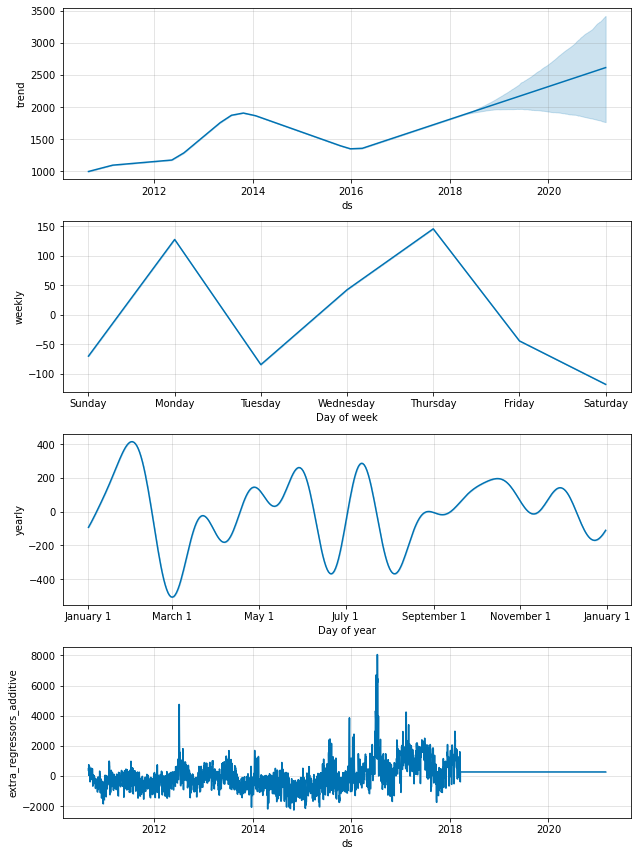

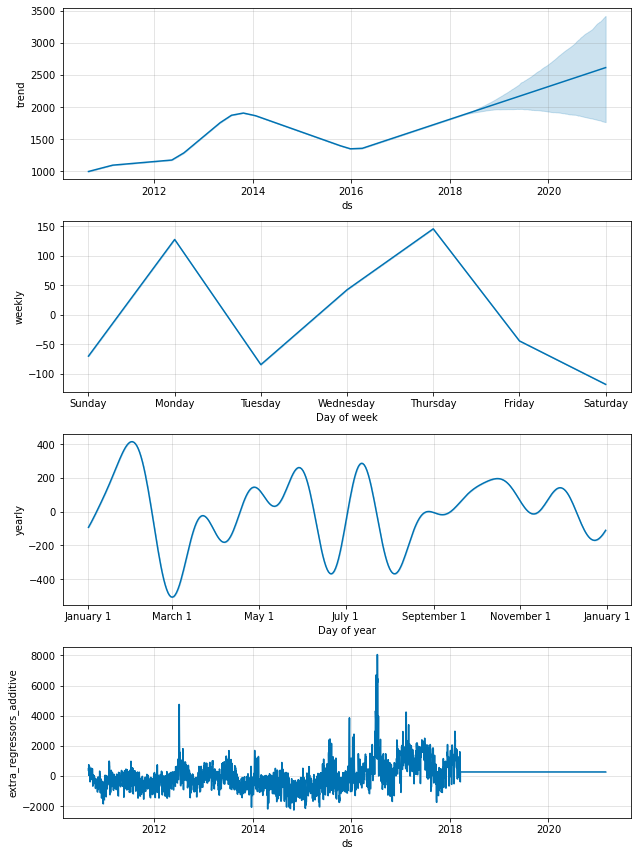

In [37]:
model_with_regressor.plot_components(ffill_forecast_with_regressor)

##### **Training multivariate model with regressors SysLoad, GasPrice as add1 and add3**

Getting variable 'data_without_Tmax'

In [38]:
#sampling data
data_without_Tmax = df_daily.copy().reset_index()
data_without_Tmax.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [39]:
data_without_Tmax = data_without_Tmax.rename(columns = {'FullDate' : 'ds', 'ElecPrice' : 'y', 'SysLoad' : 'add1', 'Tmax' : 'add2', 'GasPrice' : 'add3'})
data_without_Tmax.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


##### Splitting dataset into train & test set, such that train = first 2757 days and test = datasetlength - 2757 

In [40]:
data_without_Tmax_train, data_without_Tmax_test = data_without_Tmax[:2757], data_without_Tmax[2757:]
data_without_Tmax_train.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [41]:
data_without_Tmax_train_y, data_without_Tmax_test_y = data.y[:2757], data.y[2757:]
data_without_Tmax_train_y.head()

0    2751.700
1     570.810
2     504.975
3     502.275
4     500.555
Name: y, dtype: float64

In [42]:
data_without_Tmax_train.isnull().sum()

ds      0
add2    0
add1    0
add3    0
y       0
dtype: int64

Training model

Adding the Regressors to the dataset

In [43]:
model_without_Tmax = Prophet()
model_without_Tmax.add_regressor('add1')
model_without_Tmax.add_regressor('add3')
model_without_Tmax.fit(data_without_Tmax_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
future_without_Tmax = model_without_Tmax.make_future_dataframe(len(data_test), freq = 'D')
future_without_Tmax.head()

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05


In [45]:
future_without_Tmax

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05
...,...
3829,2021-02-24
3830,2021-02-25
3831,2021-02-26
3832,2021-02-27


In [46]:
data_without_Tmax_train['add1'].isnull().sum()

0

In [47]:
future_without_Tmax['add1'] = data_without_Tmax_train['add1']

In [48]:
future_without_Tmax['add3'] = data_without_Tmax_train['add3']
future_without_Tmax.head()

,ds,add1,add3
0,2010-09-01,41565.380,88.56
1,2010-09-02,38898.990,88.56
2,2010-09-03,41665.760,106.80
3,2010-09-04,35638.085,81.36
4,2010-09-05,35611.410,106.80


In [49]:
future_without_Tmax.isnull().sum()

ds         0
add1    1077
add3    1077
dtype: int64

In [50]:
future_without_Tmax = future_without_Tmax.fillna(method='ffill')

In [51]:
future_without_Tmax.head()

,ds,add1,add3
0,2010-09-01,41565.380,88.56
1,2010-09-02,38898.990,88.56
2,2010-09-03,41665.760,106.80
3,2010-09-04,35638.085,81.36
4,2010-09-05,35611.410,106.80


Predicting for 12 months

In [52]:
forecast_without_Tmax = model_without_Tmax.predict(future_without_Tmax)
forecast_without_Tmax.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add3,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,994.618851,-739.676243,3876.399959,994.618851,994.618851,1038.248575,1038.248575,1038.248575,-556.861372,...,42.671221,42.671221,42.671221,-5.001019,-5.001019,-5.001019,0.0,0.0,0.0,1513.676257
1,2010-09-02,995.246786,-780.924528,3637.748284,995.246786,995.246786,889.101407,889.101407,889.101407,-556.861372,...,145.282901,145.282901,145.282901,-7.950083,-7.950083,-7.950083,0.0,0.0,0.0,1464.819638
2,2010-09-03,995.874720,-545.736025,3988.932919,995.874720,995.874720,1043.863430,1043.863430,1043.863430,-289.294355,...,-44.097347,-44.097347,-44.097347,-10.949929,-10.949929,-10.949929,0.0,0.0,0.0,1695.396518
3,2010-09-04,996.502654,-1242.943312,3084.613808,996.502654,996.502654,706.699454,706.699454,706.699454,-662.479932,...,-117.803753,-117.803753,-117.803753,-13.729605,-13.729605,-13.729605,0.0,0.0,0.0,909.188819
4,2010-09-05,997.130588,-701.188224,3607.143089,997.130588,997.130588,705.207362,705.207362,705.207362,-289.294355,...,-69.193108,-69.193108,-69.193108,-16.045680,-16.045680,-16.045680,0.0,0.0,0.0,1327.804807


**Measuring Model Performance**

Calculating MAPE

In [53]:
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100

In [54]:
actual = y_train
pred = forecast['yhat'][:2757]

In [55]:
mape(actual, pred)

59.56227791978223

Calculating RMSE

In [56]:
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual = y_train
predicted = forecast['yhat'][:2757]

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

1862.9923179376394


**Measuring Regressor Model Performance**

Calculating MAPE

In [57]:
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100

In [58]:
actual_reg = data_y_train
pred_reg = ffill_forecast_with_regressor['yhat'][:2757]

In [59]:
mape(actual_reg, pred_reg)

49.98462945297828

Calculating RMSE

In [60]:
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual_reg = y_train
predicted_reg = ffill_forecast_with_regressor['yhat'][:2757]

mse = sklearn.metrics.mean_squared_error(actual_reg, pred_reg)

rmse = math.sqrt(mse)

print(rmse)

1729.064528007771


**Measuring Multivariate Model without Tmax's Performance**

Calculating MAPE

In [61]:
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100

In [62]:
actual_without_Tmax = data_without_Tmax_train_y
pred_without_Tmax = forecast_without_Tmax['yhat'][:2757]

In [63]:
mape(actual_without_Tmax, pred_without_Tmax)

49.95557063189954

Calculating RMSE

In [64]:
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual_without_Tmax = data_without_Tmax_train_y
pred_without_Tmax = forecast_without_Tmax['yhat'][:2757]

mse = sklearn.metrics.mean_squared_error(actual_without_Tmax, pred_without_Tmax)

rmse = math.sqrt(mse)

print(rmse)

1728.8254625250352
